In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
import holoviews as hv #(pro vizualizaci) 
from scipy.spatial import distance
import openpyxl

In [2]:
# Import data From file
#all data and a couple of unique values in each column

df = pd.read_csv(r'D:\A_CVUT_FEL\Bakalarska prace\security_event_data.csv')
print('all the data we have :', len(df['eventTitle']))
print(len(df['eventId'].unique()))
print(len(df['eventTitle'].unique()))
print(len(df['assetId'].unique()))

all the data we have : 887199
181
132
4932


# Part 1
We are looking if one 'eventTitle' has more than one 'eventId'. 
We have assumed that if more than one 'eventId' per 'eventTitle', it could be seen as some kind of suspicious action.

In [3]:
#df.groupby('eventTitle').eventId.nunique().to_dict()

idForTitle = df.drop_duplicates().set_index('eventId')['eventTitle'].to_dict()
values=idForTitle.values()
countIdforTitle=dict(Counter(values))
Counter(values)

#the first column is the name of the eventTitle. 
#The second is the number of how many IDs belong to that eventTitle.

Counter({'Uncommon spread techniques behavior change': 1,
         'Common spread techniques behavior change': 1,
         'Common scripting techniques behavior change': 1,
         'Uncommon initial investigation techniques behavior change': 1,
         'Common reconnaissance techniques behavior change': 1,
         'Unusual drive letter': 1,
         'Known lateral movement tools': 1,
         'Common initial investigation techniques behavior change': 1,
         'URL with an embedded IP address and non-standard port': 1,
         'URL with an embedded IP address': 1,
         'Unusual file extension': 2,
         'Public IP address discovery': 1,
         'Known malicious hostnames': 3,
         'Defense evasion commands': 1,
         'Commands that run scripts': 2,
         'Usage of wmic': 2,
         'DLL payloads execution': 1,
         'Silent install commands': 1,
         'Unusual execution directory': 2,
         'Usage of systeminfo': 1,
         'HTTP requests using RunDll

Events, with lots of eventId :

In [53]:
maxx=0
for i in countIdforTitle:
    if countIdforTitle[i]>1:
        print(i, countIdforTitle[i])
        if maxx < countIdforTitle[i]:
            maxx =countIdforTitle[i]
            r=i

print('Event with a large number of different IDs is:' , r, maxx)

Unusual file extension 2
Known malicious hostnames 3
Commands that run scripts 2
Usage of wmic 2
Unusual execution directory 2
Non-user activity 9
Anomalous destination 18
Repetitive requests or burst 3
TLS inconsistency 4
Unexpected application 5
HTTP to ip address 2
Unexpected user destination 4
Inconsistent user time activity 5
Anomalous http 2
Event with a large number of different IDs is: Anomalous destination 18


# histogram
relating to the first part. 
The x-axis is the name of the eventTitle.
The y-axis is the number of Ids.

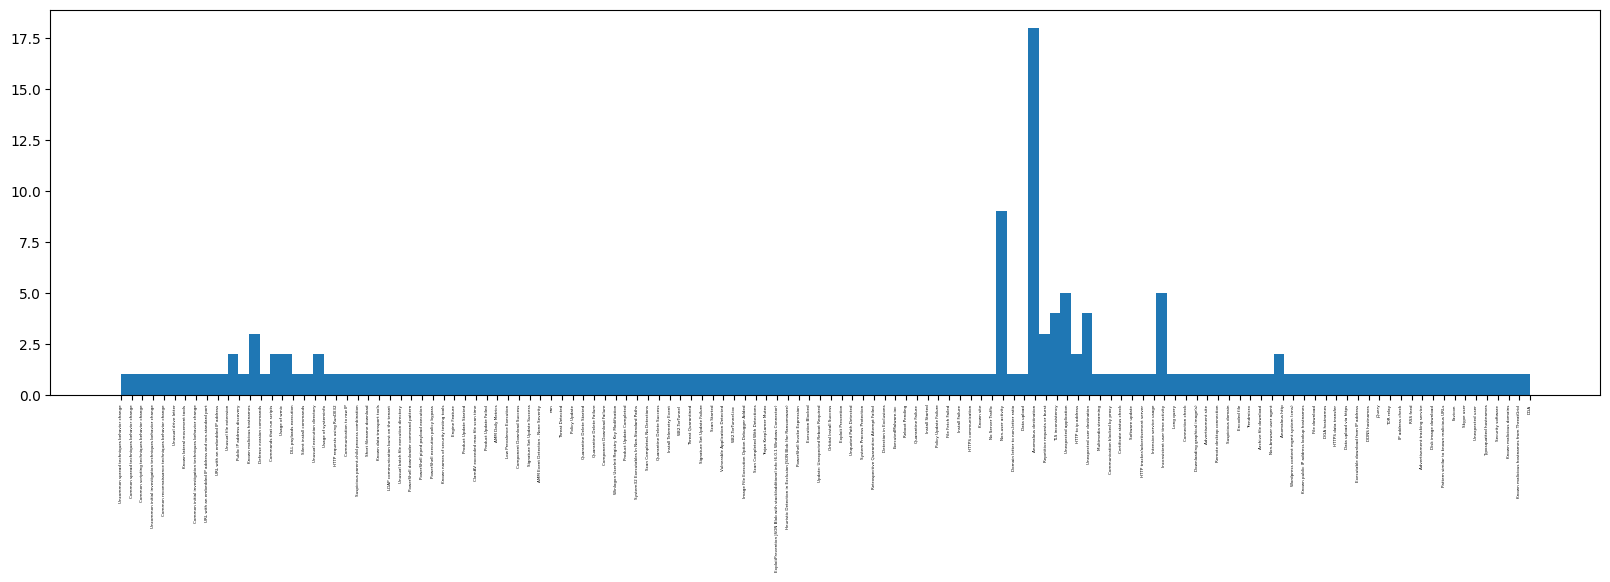

In [95]:
mylist=[key for key, val in countIdforTitle.items() for _ in range(val)]
fig, ax=plt.subplots(figsize=(20,5))
plt.hist(mylist, bins=132)
plt.xticks(fontsize=3, rotation=90)

#plt.bar(countIdforTitle.keys(), countIdforTitle.values(), color='g')
plt.show()

# Part 2
Еhe occurrence number of all the different 'eventsTitles' in the data. 

In [55]:
mainEventTitle = dict(Counter(df['eventTitle']))
Counter(df['eventTitle'])


Counter({'Uncommon spread techniques behavior change': 174,
         'Common spread techniques behavior change': 252,
         'Common scripting techniques behavior change': 89,
         'Uncommon initial investigation techniques behavior change': 6,
         'Common reconnaissance techniques behavior change': 3,
         'Unusual drive letter': 257,
         'Known lateral movement tools': 192,
         'Common initial investigation techniques behavior change': 3,
         'URL with an embedded IP address and non-standard port': 158,
         'URL with an embedded IP address': 883,
         'Unusual file extension': 140,
         'Public IP address discovery': 51,
         'Known malicious hostnames': 23,
         'Defense evasion commands': 1219,
         'Commands that run scripts': 274,
         'Usage of wmic': 418,
         'DLL payloads execution': 40,
         'Silent install commands': 116,
         'Unusual execution directory': 21,
         'Usage of systeminfo': 9,
        

# Histogram
The x-axis is the name of the eventTitle.
The y-axis is the occurrences number of eventTitles.

In [49]:
mylist=[key for key, val in mainEventTitle.items() for _ in range(val)]
fig, ax=plt.subplots(figsize=(20,5))
plt.hist(mylist, bins=132)
plt.xticks(fontsize=3, rotation=90)
plt.show()

The average of the number of eventTitles occurrences. 

In [90]:
average=0
for i in mainEventTitle:
    average+=mainEventTitle[i]
average=average/len(mainEventTitle)
print(average)

6721.204545454545


All events that have more than the average occurrence value 

In [91]:
maxx=0
for i in mainEventTitle:
    if mainEventTitle[i]>average:
        print(i, mainEventTitle[i])
        if maxx < mainEventTitle[i]:
            maxx =mainEventTitle[i]
            r=i
print('The main eventTitle is:', r, maxx)

Product Update Started 7151
ClamAV exceeded max file scan time 10770
Product Update Failed 7078
Quarantine Delete Started 16898
Quarantine Delete Success 13649
HTTPS communication 177248
Known site 208838
No Server Traffic 10513
Non-user activity 54927
Domain letter to non‐letter ratio 69767
Data upload 6820
Anomalous destination 132513
TLS inconsistency 13733
Unexpected application 61637
Multimedia streaming 11998
Communication blocked by proxy 17323
Inconsistent user time activity 11221
The main eventTitle is: Known site 208838


# Part 3
Vocabulary with meanings from when we have been observing each eventTitle.

In [3]:
dictionary = df.groupby('eventTitle')['from'].unique().to_dict()
#dictionary=defaultdict(list)
#for i,j in enumerate(df['eventTitle']):
    #if (df.loc[i, 'from']) not in dictionary[j]:
        #dictionary[j].append(df.loc[i, 'from'])

Vocabulary with meanings to when we have been observing each eventTitle.

In [57]:
dictionary2 = df.groupby('eventTitle').to.unique().to_dict()

In [58]:
minus=0
dictionary3=defaultdict(list)
for i in dictionary2:
    for j, jj in enumerate (dictionary2[i]):
        minus=dictionary2[i][j]-dictionary[i][j]
        dictionary3[i].append(minus)

How long did the eventTitles last.

In [60]:
notNullTime =defaultdict(list)
for i in dictionary3:
    if len(dictionary3[i])!=1:
        if(all(x==dictionary3[i][0] for x in dictionary3[i]))==False :
                    notNullTime[i].append(dictionary3[i])
        else:
            if 0 not in dictionary3[i]:
                notNullTime[i].append(dictionary3[i])
    else: 
        if dictionary3[i]!=[0]:
            notNullTime[i].append(dictionary3[i])


Null data :

In [61]:
a= df[df['eventTitle'].isnull()]


Unnamed: 0 eventId eventTitle                               assetId  \
4402            42     NaN        NaN  6ec42d4b-d012-3737-8886-b885ae03636f   
4441            81     NaN        NaN  b8ed3d07-787c-3fde-acaf-85acd35cb19c   
4445            85     NaN        NaN  3404e56d-36ba-3dd9-a1ed-9355835fcbf8   
4509           149     NaN        NaN  3e7b91a8-9321-35c9-ac46-ef5fb59124c4   
4608           248     NaN        NaN  524c863e-2505-3a14-9610-afadd78013fe   
...            ...     ...        ...                                   ...   
804779        5683     NaN        NaN  e43ce0ea-a769-3675-b738-87cddbe671d7   
821570         441     NaN        NaN  e43ce0ea-a769-3675-b738-87cddbe671d7   
846528        3347     NaN        NaN  e43ce0ea-a769-3675-b738-87cddbe671d7   
860988       17807     NaN        NaN  e43ce0ea-a769-3675-b738-87cddbe671d7   
867706        2517     NaN        NaN  e43ce0ea-a769-3675-b738-87cddbe671d7   

          sourceId  startDay           from             to  
4402    endpoint-2  20230119  1674087191000  1674087191000  
4441    endpoint-2  20230119  1674087956000  1674087956000  
4445    endpoint-2  20230119  1674088084000  1674088084000  
4509    endpoint-2  20230119  1674088921000  1674088921000  
4608    endpoint-2  20230119  1674090776000  1674090776000  
...            ...       ...            ...            ...  
804779   network-1  20230119  1674164100000  1674164400000  
821570   network-1  20230119  1674164100000  1674164400000  
846528   network-1  20230119  1674162900000  1674163200000  
860988   network-1  20230119  1674164400000  1674164700000  
867706   network-1  20230119  1674164400000  1674164700000  

[1013 rows x 8 columns]

# Part 4
Which eventTitles relate to which 'sourceId'. We have three in 'sourceId' (endpoint1-1, endpoint-2, network-1).

In [62]:
countSourseId = dict(Counter(df['sourceId']))
Counter(df['sourceId'])

Counter({'endpoint-1': 4360, 'endpoint-2': 76756, 'network-1': 806083})

In [63]:
dictionary4 = df.groupby('eventTitle').sourceId.unique().to_dict()

All events that lasted longer than 0 millisecond were extracted from the network-1.

In [64]:
for i in notNullTime:
    print(i, dictionary4[i])

Advertisement site ['network-1']
Advertisement tracking service ['network-1']
Anomalous destination ['network-1']
Anomalous http ['network-1']
Archive file download ['network-1']
Certificate status check ['network-1']
Communication blocked by proxy ['network-1']
Connection check ['network-1']
DDNS hostnames ['network-1']
DGA ['network-1']
DGA hostnames ['network-1']
Data upload ['network-1']
Data upload via https ['network-1']
Disk image download ['network-1']
Domain letter to non‐letter ratio ['network-1']
Encoded file ['network-1']
Executable download from IP address ['network-1']
Favicon ['network-1']
File download ['network-1']
HTTP to ip address ['network-1']
HTTP tracker/advertisement server ['network-1']
HTTPS communication ['network-1']
HTTPS data transfer ['network-1']
IP address check ['network-1']
Inconsistent user time activity ['network-1']
Intensive service usage ['network-1']
Known malicious domains ['network-1']
Known malicious hostnames ['endpoint-1' 'network-1']
Known

# Part 5
How many different assetIds, and which eventTitles relate to them.

In [3]:
countSourceId = df.groupby('assetId').eventTitle.nunique().to_dict()
countSourceId

{'0006c31c-e17a-30fd-b253-7d08b64f3307': 16,
 '0043d637-a1ee-390f-920f-4ca96a7f8691': 13,
 '00492703-3d34-3829-976f-632344d6a485': 12,
 '004bc45c-5580-331f-9473-09dc8dc93450': 3,
 '00543c43-95b4-3212-8ed6-0385d5f1a9e4': 5,
 '00599d43-09ed-32b1-bc66-ba4772cd3b34': 4,
 '005a8644-f6a7-35d0-a824-38dd71632c29': 18,
 '0063b251-ace2-3b58-b8a1-3fb7edacdfaf': 3,
 '0067d0cd-8282-357e-9196-5b8c945c7851': 6,
 '007097dd-a3db-3474-8a84-e68644bfe50f': 6,
 '007341b2-46ce-3811-9ef1-6510ec9164be': 2,
 '007d14de-a68a-39ee-8a10-7627bf19837e': 4,
 '0082e565-55da-385d-97e4-113a254603f7': 5,
 '009444ad-463f-3002-9d03-f99fe6d13b21': 13,
 '00a49c1c-9866-3d51-bac0-07eae6bd9957': 4,
 '00a7bc31-b8f7-30e5-b22c-b20669a07b9b': 3,
 '00aa9611-256b-3278-9934-051367ef85f8': 15,
 '00aace62-bf80-3001-a45e-43ea1986240f': 3,
 '00ab506f-a3fa-3a7e-8bfb-70d345b8c26e': 3,
 '00afea78-12ba-3090-8243-750a7eabbefe': 5,
 '00b735a4-ac41-3a18-8e3c-f4891eacb18f': 2,
 '00d83d7b-8a02-337a-a1f5-b6c0280cda39': 3,
 '00f79a25-3b31-3e41-b603-

In [11]:
average=0
for i in countSourceId:
    average+=countSourceId[i]
average=average/len(countSourceId)
print(average)

6.317518248175182


In [12]:
maxx=0
for i in countSourceId:
    if countSourceId[i]>average:
        print(i, countSourceId[i])
        if maxx < countSourceId[i]:
            maxx =countSourceId[i]
            r=i
print('The assetId which have more then average eventTitle is:', r, maxx)

0006c31c-e17a-30fd-b253-7d08b64f3307 16
0043d637-a1ee-390f-920f-4ca96a7f8691 13
00492703-3d34-3829-976f-632344d6a485 12
005a8644-f6a7-35d0-a824-38dd71632c29 18
009444ad-463f-3002-9d03-f99fe6d13b21 13
00aa9611-256b-3278-9934-051367ef85f8 15
00f79a25-3b31-3e41-b603-a0260ddb4a16 7
0146b894-e0e5-3999-a05b-88c825bcbdfb 8
01503c9c-a91c-3236-8ba5-e1f5450ba00f 14
01660c79-fc1d-3967-aebf-64668de87134 12
01ae3bf4-56b5-381d-b085-ffd2ef362d68 14
01c7aec0-68e0-3da0-9ce2-cfc88eb23a28 7
01eacb4b-ff42-30c6-949f-7cc525f8b595 10
02273acd-5afa-358e-af5d-80889fe08ee8 14
0288bdf1-f2a1-35d7-9665-79eb016c714a 12
02dac018-7d69-3451-804f-143cea102048 8
02de68ae-3e7b-3fe0-8684-3eb155b0521e 9
02e15c31-864e-37d0-8b18-e2ebed2dedc1 14
033fd225-774d-31b0-ab10-5c3aae2425a3 9
039201e4-6565-3206-837f-1a59977941c7 7
039702dc-62a2-322c-bbb1-72932f005d9d 7
0465356e-c87c-38f0-b851-9070b9f47a54 14
0523138c-3547-379f-8ec2-bb76f97b2d89 12
0526e371-6c1b-356a-80c1-50515aee28ac 15
056014a8-876e-3777-8350-f21f5a90110c 14
0571862a

In [4]:
oneEncodedVector = df.groupby('assetId').eventTitle.unique().to_dict()
oneEncodedVector

{'0006c31c-e17a-30fd-b253-7d08b64f3307': array(['HTTPS communication', 'Known site', 'Anomalous destination',
        'Inconsistent user time activity', 'Data upload',
        'Unexpected application', 'Non-user activity',
        'Unexpected user destination', 'Multimedia streaming',
        'Communication blocked by proxy', 'TLS inconsistency',
        'No Server Traffic', 'Connection check',
        'Domain letter to non‐letter ratio',
        'Repetitive requests or burst', 'Downloading graphical image(s)'],
       dtype=object),
 '0043d637-a1ee-390f-920f-4ca96a7f8691': array(['No Server Traffic', 'Non-user activity',
        'Unexpected user destination', 'HTTPS communication', 'Known site',
        'Communication blocked by proxy', 'Anomalous destination',
        'Unexpected application', 'Connection check',
        'HTTP tracker/advertisement server', 'HTTP to ip address',
        'TLS inconsistency', 'Repetitive requests or burst'], dtype=object),
 '00492703-3d34-3829-976f-632

In [5]:
uniqueAssets = df['assetId'].unique()

In [6]:
uniqueEventTitle = df['eventTitle'].unique()

In [7]:
dicct=defaultdict(list)
for i in uniqueAssets:
    for j in uniqueEventTitle:
        if j in oneEncodedVector[i]: dicct[i].append(1)
        else: dicct[i].append(0)


In [83]:
dicct

defaultdict(list,
            {'8b65448f-96b2-314a-bd1f-23569a1a6144': [1,
              0,
              0,
              0,
              0,
              0,
              1,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              1,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              1,
              0,
              1,
              0,
              0,
              0,
              0,
              1,
              0,
              0,
              0,
              0,
       

# Part 6
Prepare a dataset in the form of one-hot-encoded vector for each asset.


In [8]:
dfDicct = pd.DataFrame(dicct).T

In [84]:
dfDicct

0    1    2    3    4    5    6    7    \
8b65448f-96b2-314a-bd1f-23569a1a6144    1    0    0    0    0    0    1    0   
80531c37-618b-3066-99a7-d0349fa083ca    0    1    0    0    0    0    0    0   
c18a550f-9172-3de8-a75d-1cb3833ac35a    0    1    1    0    0    0    0    0   
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee    1    1    0    0    0    0    0    0   
3033624b-558c-3dd3-bb03-cbf255c25198    1    0    0    0    0    0    0    0   
...                                   ...  ...  ...  ...  ...  ...  ...  ...   
23a4c5b4-20ad-330b-981c-8a0954e75d07    0    0    0    0    0    0    0    0   
a618da6a-902e-3854-b2cc-a7a4fd16437e    0    0    0    0    0    0    0    0   
00a7bc31-b8f7-30e5-b22c-b20669a07b9b    0    0    0    0    0    0    0    0   
6b2f4636-eb56-3158-b3f1-88869bbf7ec0    0    0    0    0    0    0    0    0   
ad0749d7-d128-3f6b-94fb-b6e6edf041c7    0    0    0    0    0    0    0    0   

                                      8    9    ...  122  123  124  125  126  \
8b65448f-96b2-314a-bd1f-23569a1a6144    0    0  ...    0    0    0    0    0   
80531c37-618b-3066-99a7-d0349fa083ca    0    0  ...    0    0    0    0    0   
c18a550f-9172-3de8-a75d-1cb3833ac35a    0    0  ...    0    0    0    0    0   
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee    0    0  ...    0    0    0    0    0   
3033624b-558c-3dd3-bb03-cbf255c25198    0    0  ...    0    0    0    0    0   
...                                   ...  ...  ...  ...  ...  ...  ...  ...   
23a4c5b4-20ad-330b-981c-8a0954e75d07    0    0  ...    0    0    0    0    0   
a618da6a-902e-3854-b2cc-a7a4fd16437e    0    0  ...    0    0    0    0    0   
00a7bc31-b8f7-30e5-b22c-b20669a07b9b    0    0  ...    0    0    0    0    0   
6b2f4636-eb56-3158-b3f1-88869bbf7ec0    0    0  ...    0    0    0    0    0   
ad0749d7-d128-3f6b-94fb-b6e6edf041c7    0    0  ...    0    0    0    0    0   

                                      127  128  129  130  131  
8b65448f-96b2-314a-bd1f-23569a1a6144    0    0    0    0    0  
80531c37-618b-3066-99a7-d0349fa083ca    0    0    0    0    0  
c18a550f-9172-3de8-a75d-1cb3833ac35a    0    0    0    0    0  
a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee    0    0    0    0    0  
3033624b-558c-3dd3-bb03-cbf255c25198    0    0    0    0    0  
...                                   ...  ...  ...  ...  ...  
23a4c5b4-20ad-330b-981c-8a0954e75d07    0    0    0    0    0  
a618da6a-902e-3854-b2cc-a7a4fd16437e    0    0    0    0    0  
00a7bc31-b8f7-30e5-b22c-b20669a07b9b    0    0    0    0    0  
6b2f4636-eb56-3158-b3f1-88869bbf7ec0    0    0    0    0    0  
ad0749d7-d128-3f6b-94fb-b6e6edf041c7    0    0    0    0    0  

[4932 rows x 132 columns]

A few examples where I show the difference between the appropriate distance measures 

# Euclidean distance

In [94]:
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['80531c37-618b-3066-99a7-d0349fa083ca']))
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
print(distance.euclidean(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['3033624b-558c-3dd3-bb03-cbf255c25198']))


2.8284271247461903
3.3166247903554
3.1622776601683795
2.8284271247461903


# Manhattan distance


In [9]:
print(distance.cityblock(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['80531c37-618b-3066-99a7-d0349fa083ca']))
print(distance.cityblock(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
print(distance.cityblock(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
print(distance.cityblock(dfDicct.loc['8b65448f-96b2-314a-bd1f-23569a1a6144'], dfDicct.loc['3033624b-558c-3dd3-bb03-cbf255c25198']))

8
11
10
8


In [13]:
dfDicct.loc[['8b65448f-96b2-314a-bd1f-23569a1a6144', 'c18a550f-9172-3de8-a75d-1cb3833ac35a']]

0    1    2    3    4    5    6    7    \
8b65448f-96b2-314a-bd1f-23569a1a6144    1    0    0    0    0    0    1    0   
c18a550f-9172-3de8-a75d-1cb3833ac35a    0    1    1    0    0    0    0    0   

                                      8    9    ...  122  123  124  125  126  \
8b65448f-96b2-314a-bd1f-23569a1a6144    0    0  ...    0    0    0    0    0   
c18a550f-9172-3de8-a75d-1cb3833ac35a    0    0  ...    0    0    0    0    0   

                                      127  128  129  130  131  
8b65448f-96b2-314a-bd1f-23569a1a6144    0    0    0    0    0  
c18a550f-9172-3de8-a75d-1cb3833ac35a    0    0    0    0    0  

[2 rows x 132 columns]

# Chebyshev distance

In [17]:
dist12=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['80531c37-618b-3066-99a7-d0349fa083ca']))
dist13=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
dist14=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
dist15=distance.chebyshev(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['3033624b-558c-3dd3-bb03-cbf255c25198']))


In [18]:
print(dist12, dist13, dist14, dist15)

1 1 1 1


# Canberra distance

In [19]:
dist12=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['80531c37-618b-3066-99a7-d0349fa083ca']))
dist13=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
dist14=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
dist15=distance.canberra(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['3033624b-558c-3dd3-bb03-cbf255c25198']))


In [20]:
print(dist12, dist13, dist14, dist15)

8.0 11.0 10.0 8.0


# Cosine similarity

In [23]:
dist12=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['80531c37-618b-3066-99a7-d0349fa083ca']))
dist13=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['c18a550f-9172-3de8-a75d-1cb3833ac35a']))
dist14=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['a9ba63d1-5ef6-3f5d-8ccf-21dee33e29ee']))
dist15=distance.cosine(np.array(dict['8b65448f-96b2-314a-bd1f-23569a1a6144']), np.array(dict['3033624b-558c-3dd3-bb03-cbf255c25198']))


In [24]:
print(dist12, dist13, dist14, dist15)

0.7958758547680684 1.0 0.7113248654051871 0.5669872981077807


In [68]:
dfDicct.to_excel('./oneEncodedVector.xlsx')

In [69]:
a=-1
for i in uniqueEventTitle:
    a+=1
    print(a, i)

0 Uncommon spread techniques behavior change
1 Common spread techniques behavior change
2 Common scripting techniques behavior change
3 Uncommon initial investigation techniques behavior change
4 Common reconnaissance techniques behavior change
5 Unusual drive letter
6 Known lateral movement tools
7 Common initial investigation techniques behavior change
8 URL with an embedded IP address and non-standard port
9 URL with an embedded IP address
10 Unusual file extension
11 Public IP address discovery
12 Known malicious hostnames
13 Defense evasion commands
14 Commands that run scripts
15 Usage of wmic
16 DLL payloads execution
17 Silent install commands
18 Unusual execution directory
19 Usage of systeminfo
20 HTTP requests using RunDll32
21 Communication to raw IP
22 Suspicious parent-child process combination
23 Short filename download
24 Known data transport tools
25 LDAP communication burst on the tenant
26 Unusual batch file execution directory
27 PowerShell downloader command patter

In [96]:
a1= [1	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	1	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2216533343.py, line 1)

In [97]:
a3=[0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2396151689.py, line 1)